## 1.Essential Libraries To Import

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras

Using TensorFlow backend.


## 2.Importing Data

In [28]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df = df.drop(["id","lang","retweet_count","original_author"], axis=1)
testID = df_test["id"]
df_test = df_test.drop(["id","lang","retweet_count","original_author"], axis=1)

In [4]:
df.columns

Index(['original_text', 'sentiment_class'], dtype='object')

In [5]:
df_test.columns

Index(['original_text'], dtype='object')

In [6]:
df.shape

(3235, 2)

In [7]:
df.head()

,original_text,sentiment_class
0,Happy #MothersDay to all you amazing mothers o...,0
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0
2,Happy mothers day To all This doing a mothers ...,-1
3,Happy mothers day to this beautiful woman...ro...,0
4,Remembering the 3 most amazing ladies who made...,-1


In [8]:
df_test.head()

,original_text
0,"3. Yeah, I once cooked potatoes when I was 3 y..."
1,"Happy Mother's Day to all the mums, step-mums,..."
2,"I love the people from the UK, however, when I..."
3,Happy 81st Birthday Happy Mother’s Day to my m...
4,Happy Mothers day to all those wonderful mothe...


In [9]:
df.describe()

,sentiment_class
count,3235.000000
mean,-0.001236
std,0.688719
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df.isnull().any()

original_text      False
sentiment_class    False
dtype: bool

## 3.Data Cleaning (Preprocessing)

In [11]:
def clean_data(df, train_data=True):
    for i in range(len(df)):
        lst = list(re.split('-| |//|/|!|\(|\)|@|\.\.\.|\+|>>|…|<', df["original_text"][i].lower()))
        if 'pic.twitter.com' in lst:
            lst = lst[:lst.index('pic.twitter.com')]
        if 'https:' in lst:
            lst = lst[:lst.index('https:')]
        if 'http:' in lst:
            lst = lst[:lst.index('http:')]
        for j in lst:
            if not j.isalpha():
                lst.remove(j)
                continue
            if "xx" in j:
                lst.remove(j)
                continue
            if j == '' or j == '-' or j == '&' or j == '#' or j == '!' or j == '(' or j == ')' or j == '…' or j == '@' or j == ',' or j == ':' or j == '<':
                lst.remove(j)
            if len(j) > 2:
                if j[-1] == '.':
                    lst.remove(j)
                    lst.append(j[:-1])
        
        if train_data:
            if df["sentiment_class"][i] == 1:
                df["sentiment_class"][i] = "positive"
            if df["sentiment_class"][i] == -1:
                df["sentiment_class"][i] = "negative"
            if df["sentiment_class"][i] == 0:
                df["sentiment_class"][i] = "neutral"
        
        df["original_text"][i] = ' '.join(lst)
        #print(df["original_text"][i])

def tokenizing(df):
    tokenizer_ = Tokenizer(oov_token="<OOV>")
    tokenizer_.fit_on_texts(df["original_text"].astype(str))
    word_index = tokenizer_.word_index
    
    sequences = tokenizer_.texts_to_sequences(df["original_text"])
    padded = pad_sequences(sequences, maxlen=128, padding='post', truncating='post')
    
    return padded

### 3.1 Processing Train Data 

In [12]:
clean_data(df)
X = tokenizing(df)
y = df["sentiment_class"]

C:\Users\Vijay\anaconda3\envs\Tensorflow_GPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Vijay\anaconda3\envs\Tensorflow_GPU\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 3.2 Processing Test Data

In [13]:
clean_data(df_test, False)
X_evaluate = tokenizing(df_test)

## 4. Data Visualization 

#### 4.1 Unique Categories Count  

                original_text
                        count
sentiment_class              
negative                  769
neutral                  1701
positive                  765


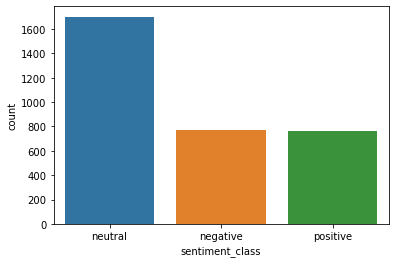

In [14]:
#Ploting Categories Count

print(df.groupby(["sentiment_class"]).agg(["count"]))
sns.countplot(df["sentiment_class"])

#### 4.2 Plot of Variation of Length of Tweets 

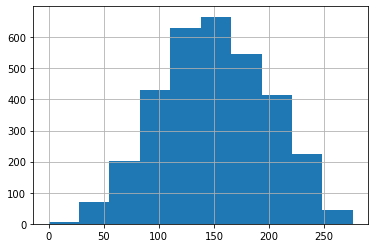

In [15]:
maxlen = [len(x) for x in df["original_text"]]
pd.Series(maxlen).hist()
plt.show()

#### 4.3 Using WordCloud To Identify the Frequent Words in Each Category 

#### 4.3.0 Identifying Tweet Category 

In [16]:
pos_tweets = ""
net_tweets = ""
neg_tweets = ""
for i in range(len(df)):
    if df["sentiment_class"][i] == "positive":
        pos_tweets = pos_tweets + " " + df["original_text"][i]
    elif df["sentiment_class"][i] == "negative":
        neg_tweets = neg_tweets + " " + df["original_text"][i]
    elif df["sentiment_class"][i] == "neutral":
        net_tweets = net_tweets +" " + df["original_text"][i]
        
pos_tweets = ' '.join(list(set(list(pos_tweets.split(' ')))))
neg_tweets = ' '.join(list(set(list(neg_tweets.split(' ')))))
net_tweets = ' '.join(list(set(list(net_tweets.split(' ')))))

##### 4.3.1 Positive Tweets WordCloud 

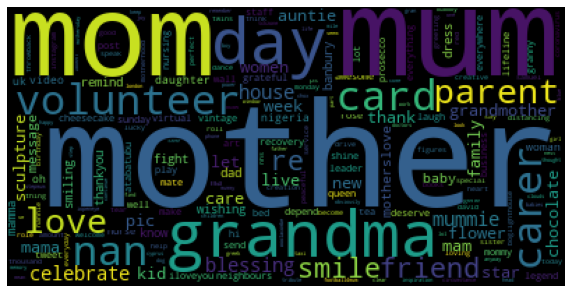

In [17]:
plt.figure(figsize=(10,15))
plt.imshow(WordCloud(stopwords = STOPWORDS).generate(pos_tweets))
plt.axis('off')
plt.show()

##### 4.3.2 Negative Tweets WordCloud

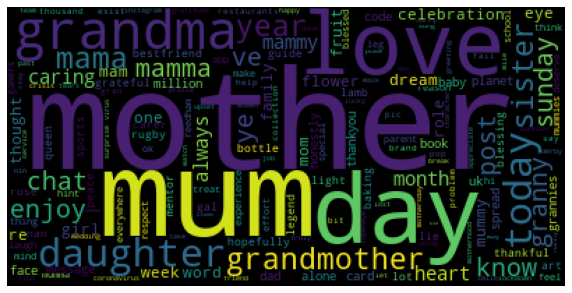

In [18]:
plt.figure(figsize=(10,15))
plt.imshow(WordCloud(stopwords = STOPWORDS).generate(neg_tweets))
plt.axis('off')
plt.show()

##### 4.3.3 Neutral Tweets WordCloud

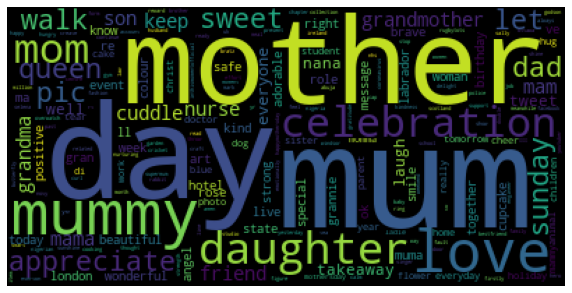

In [19]:
plt.figure(figsize=(10,15))
plt.imshow(WordCloud(stopwords = STOPWORDS).generate(net_tweets))
plt.axis('off')
plt.show()

## 5. Fitting a Machine Learning Model 

### 5.1 Applying Cross Validation on Some Classifiers

In [20]:
#SVM
svm_clf = SVC(kernel = 'rbf')
scores = cross_val_score(svm_clf, X, y, cv=15)
print(scores.mean())

#Naive Bayes Classifer
byes_clf = GaussianNB()
scores = cross_val_score(byes_clf, X, y, cv=15)
print(scores.mean())

#DecisionTree Classifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
scores = cross_val_score(dt_clf, X, y, cv=15)
print(scores.mean())

#RandomForest Classifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
scores = cross_val_score(rf_clf, X, y, cv=15)
print(scores.mean())

0.5239563594602353
0.48812661498708
0.3749684180304335
0.44142980189491815


##### From the Above Classifiers Score we can  see that SVM performs well on Training DataSet

#### 5.2 Applying SVM Classifier on Training Data Set 

In [21]:
#Splitting Training Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
#Fitting SVM Classifier
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [23]:
y_test_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
accuracy_score(y_test, y_test_pred)

[[  0 161   0]
 [  2 324   1]
 [  1 158   0]]


0.500772797527048

#### 5.3 Predicting the Test Dataset using SVM Classifier 

In [25]:
y_pred = classifier.predict(X_evaluate)
print(y_pred)

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


In [36]:
predictions_dict = {}
for i in range(len(testID)):
    if y_pred[i] == "neutral":
        predictions_dict[str(testID[i])] = 0
    if y_pred[i] == "positive":
        predictions_dict[str(testID[i])] = 1
    if y_pred[i] == "negative":
        predictions_dict[str(testID[i])] = -1

In [44]:
with open('Final_Predictions.csv','w') as Outputfile:
    Outputfile.write("id, sentiment_class\n")
    for i in predictions_dict.keys():
        Outputfile.write("{}, {}\n".format(i, predictions_dict[i]))